1. 

(X_train=80%)
(X_test=20%)

A partir del archivo "iris.csv" que se corresponde con datos relacionados con tres tipos de plantas (el target es el tipo de planta):

- Mediante knn, predice qué planta se corresponde con los ejemplos: [[15.7,2.8,9.5,0.1]] y [[1.7,3.8,4.5,11.3]] para k=3 y k=7
- ¿Qué acierto tiene tu modelo para k=3, k=7? (score)
- Entre 1 y 20, ¿qué k tiene un mejor acierto en tu modelo? visualiza el score con el valor de k en una gráfica.
- Utiliza un conjunto de test con el 60% de los datos: ¿cambian los resultados anteriores? ¿por qué?
- Elimina la clase "Setosa" de tus datos. Repite el proceso anterior, ¿cambian los resultados?
- ¿Consideras Knn un buen algoritmo para estos datos? ¿por qué?

In [1]:
import pandas as pd 
import numpy as np 
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier


In [4]:
dt= pd.read_csv("../data/iris.csv")
dt

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [5]:
dt.variety.value_counts()

Versicolor    50
Setosa        50
Virginica     50
Name: variety, dtype: int64

In [6]:
label = preprocessing.LabelEncoder()
variety = label.fit_transform(dt.variety)
variety

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [28]:
y = np.array(variety)
y.shape


(150,)

In [27]:
X= np.array(dt.drop(["variety"], axis=1))
X.shape


(150, 4)

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [35]:
#K = 3
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [36]:
from sklearn import metrics
y_pred = model.predict(X_test)
print("Score k= 3:", model.score(X_test, y_test))

Score k= 3: 0.9666666666666667


In [37]:
# Se corresponde con el tipo de planta Virginica
k_3 = model.predict([[15.7,2.8,9.5,0.1]])
k_3

array([2])

In [38]:
# k=7
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [39]:
y_pred = model.predict(X_test)
print("Score k= 7:", model.score(X_test, y_test))

Score k= 7: 0.9666666666666667


In [40]:
#Tambien se corresponde con Virginica 
k_7= model.predict([[1.7,3.8,4.5,11.3]])
k_7

array([2])

Entre 1 y 20, ¿qué k tiene un mejor acierto en tu modelo? visualiza el score con el valor de k en una gráfica.

[0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 0.9666666666666667, 1.0, 0.9333333333333333, 0.9666666666666667, 0.9666666666666667, 1.0, 0.9666666666666667, 1.0, 0.9666666666666667, 1.0, 0.9666666666666667, 0.9666666666666667]


([<matplotlib.axis.XTick at 0x18126faabe0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

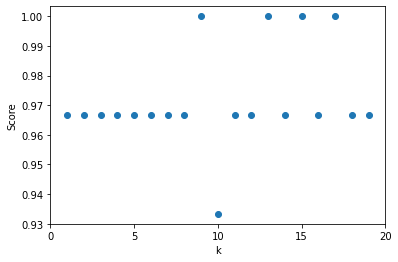

In [42]:
#las mejores k son la 8, 12, 14 y 16
import matplotlib.pyplot as plt
k_range = range(1, 20)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    knn.fit(X_train, y_train)
    scores.append(knn.score(X_test, y_test))
print(scores)
plt.figure()
plt.xlabel('k')
plt.ylabel('Score')
plt.scatter(k_range, scores)
plt.xticks([0,5,10,15,20])

Utiliza un conjunto de test con el 60% de los datos: ¿cambian los resultados anteriores? ¿por qué?

In [47]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40)

In [48]:
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Score k=3:", model.score(X_test, y_test))

Score k=3: 1.0


In [49]:
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Score k=7:", model.score(X_test, y_test))

Score k=7: 1.0


Elimina la clase "Setosa" de tus datos. Repite el proceso anterior, ¿cambian los resultados?

In [52]:
df= dt[dt.variety != "Setosa"]
df

,sepal.length,sepal.width,petal.length,petal.width,variety
50,7.0,3.2,4.7,1.4,Versicolor
51,6.4,3.2,4.5,1.5,Versicolor
52,6.9,3.1,4.9,1.5,Versicolor
53,5.5,2.3,4.0,1.3,Versicolor
54,6.5,2.8,4.6,1.5,Versicolor
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [55]:
X= np.array(df.drop(["variety"], axis=1))
X.shape

(100, 4)

In [58]:
label = preprocessing.LabelEncoder()
variety = label.fit_transform(df.variety)
y= np.array(variety)
y.shape

(100,)

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
model = KNeighborsClassifier(n_neighbors=3)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Score k=3:", model.score(X_test, y_test))

Score k=3: 0.95


In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
print("Score k=7:", model.score(X_test, y_test))

Score k=7: 0.9


¿Consideras Knn un buen algoritmo para estos datos? ¿por qué?

Si en todos los ejemplos da un porcentaje alto de aciertos y para clasificar los datos parece que el modelo funciona muy bien